In [1]:
import pandas as pd
import geopandas as gpd

import os


import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.merge import merge
from rasterio.plot import show
import os
import rasterio
from rasterio.mask import mask

import geopandas as gpd
import pyproj
from shapely.ops import transform

In [ ]:
districts = gpd.read_file('../_data/shape_file/DISTRITOS.shp')
districts = districts.to_crs(54009)

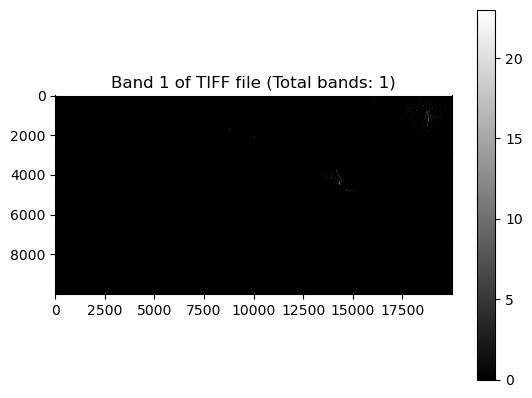

The TIFF file has 1 bands.


In [35]:
import rasterio
import matplotlib.pyplot as plt

# Path to the TIFF file
tif_file_path = '../_data/rasters_europa/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R12_C11 (1)/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R12_C11.tif'

# Since we can't access external files in this environment, this code is for demonstration purposes only
# Replace the path with the actual path when you run it in your local environment

# Open the TIFF file
with rasterio.open(tif_file_path) as src:
    # Read the number of bands
    num_bands = src.count
    
    # Read the first band data
    band1 = src.read(1)
    
    # Plot the first band
    plt.imshow(band1, cmap='gray')
    plt.colorbar()
    plt.title(f'Band 1 of TIFF file (Total bands: {num_bands})')
    plt.show()
    
    # Output the number of bands
    print(f"The TIFF file has {num_bands} bands.")


In [26]:
import pyproj
transformer = pyproj.Transformer.from_crs('epsg:4326', 'esri:54009', always_xy=True)

# Define a function to apply the transformation
def apply_transform(geom):
    return transform(transformer.transform, geom)

# Apply the transformation to the geometries
districts['geometry'] = districts['geometry'].apply(apply_transform)

In [47]:
minx, miny, maxx, maxy = districts.total_bounds

In [48]:
from rasterio.windows import from_bounds

In [51]:
# Ensure the shapefile is in the same CRS as the raster
raster_path = '../_data/rasters_europa/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R11_C11 (1)/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R11_C11.tif'
with rasterio.open(raster_path) as src:

    # Create a mask for the intersection area
    shapes = [feature["geometry"] for _, feature in districts.iterrows()]
    out_image, out_transform = mask(src, shapes, crop=True)
    out_meta = src.meta.copy()

# Update the metadata for the new (clipped) raster
out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# Save the clipped raster to a new file
output_raster_path = '/Users/ar8787/Documents/GitHub/Diplomado_PUCP/_data/raster_trim_europa/clipped_raster_intersection.tif'
with rasterio.open(output_raster_path, 'w', **out_meta) as dst:
    dst.write(out_image)

In [53]:
import geopandas as gpd
from rasterstats import zonal_stats

In [54]:
raster_path = '../_data/rasters_europa/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R11_C11 (1)/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R11_C11.tif'
stats = zonal_stats(districts, raster_path, stats="unique", categorical=True)


In [ ]:
stats